**Crash Analysis of Washington DC**

In [ ]:
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)
    return conn

def create_table(conn, create_table_sql, drop_table_name=None):
    if drop_table_name:  # You can optionally pass drop_table_name to drop the table.
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)
    rows = cur.fetchall()
    return rows

**Creation of Non-Normalized Database**

Steps Followed:

(1) Created connection to the "Non_Normalized.db" database

(2) Created a NonNormalized table to upload the data in csv file using pandas dataframe.

In [26]:
conn = create_connection('Non_Normalized.db')
sql_string = "CREATE TABLE NonNormalized(X REAL,Y REAL,OBJECTID INTEGER,CRIMEID TEXT,CCN INTEGER,REPORTDATE DATETIME,ROUTEID INTEGER,MEASURE REAL,OFFSET REAL,STREETSEGID INTEGER,ROADWAYSEGID INTEGER,FROMDATE DATETIME,TODATE DATETIME,ADDRESS TEXT,LATITUDE REAL,LONGITUDE REAL,XCOORD REAL,YCOORD REAL,WARD TEXT,EVENTID TEXT,MAR_ADDRESS TEXT,MAR_SCORE REAL,MAJORINJURIES_BICYCLIST INTEGER,MINORINJURIES_BICYCLIST INTEGER,UNKNOWNINJURIES_BICYCLIST INTEGER,FATAL_BICYCLIST INTEGER,MAJORINJURIES_DRIVER INTEGER,MINORINJURIES_DRIVER INTEGER,UNKNOWNINJURIES_DRIVER INTEGER,FATAL_DRIVER INTEGER,MAJORINJURIES_PEDESTRIAN INTEGER,MINORINJURIES_PEDESTRIAN INTEGER,UNKNOWNINJURIES_PEDESTRIAN INTEGER,FATAL_PEDESTRIAN INTEGER,TOTAL_VEHICLES INTEGER,TOTAL_BICYCLES INTEGER,TOTAL_PEDESTRIANS INTEGER,PEDESTRIANSIMPAIRED INTEGER,BICYCLISTSIMPAIRED INTEGER,DRIVERSIMPAIRED INTEGER,TOTAL_TAXIS INTEGER,TOTAL_GOVERNMENT INTEGER,SPEEDING_INVOLVED INTEGER,NEARESTINTROUTEID INTEGER,NEARESTINTSTREETNAME TEXT,OFFINTERSECTION REAL,INTAPPROACHDIRECTION TEXT,LOCATIONERROR TEXT,LASTUPDATEDATE DATETIME,MPDLATITUDE REAL,MPDLONGITUDE REAL,MPDGEOX REAL,MPDGEOY REAL,FATALPASSENGER INTEGER,MAJORINJURIESPASSENGER INTEGER,MINORINJURIESPASSENGER INTEGER,UNKNOWNINJURIESPASSENGER INTEGER,MAR_ID INTEGER)"
create_table(conn, sql_string)
crashes = pd.read_csv('Crashes_in_DC.csv')
crashes.to_sql('NonNormalized', conn, if_exists='replace', index = False)
conn.close()

**Creation of Normalized database and tables**

(1) Normalized.db is created and connection is established.

(2) Injuries table is created with CrimeID and severity of injuries among Bi-Cyclists, Drivers, Pedestrians and Passengers. 

In [28]:
create_injuries_table = "CREATE TABLE INJURIES(CRIMEID INTEGER NOT NULL PRIMARY KEY, MAJORINJURIES_BICYCLIST INTEGER NOT NULL,MINORINJURIES_BICYCLIST INTEGER NOT NULL,UNKNOWNINJURIES_BICYCLIST INTEGER NOT NULL,FATAL_BICYCLIST INTEGER NOT NULL,MAJORINJURIES_DRIVER INTEGER NOT NULL,MINORINJURIES_DRIVER INTEGER NOT NULL,UNKNOWNINJURIES_DRIVER INTEGER NOT NULL,FATAL_DRIVER INTEGER NOT NULL,MAJORINJURIES_PEDESTRIAN INTEGER NOT NULL,MINORINJURIES_PEDESTRIAN INTEGER NOT NULL,UNKNOWNINJURIES_PEDESTRIAN INTEGER NOT NULL,FATAL_PEDESTRIAN INTEGER NOT NULL,FATALPASSENGER INTEGER NOT NULL,MAJORINJURIESPASSENGER INTEGER NOT NULL,MINORINJURIESPASSENGER INTEGER NOT NULL,UNKNOWNINJURIESPASSENGER INTEGER NOT NULL)"
conn = create_connection('Normalized.db')
create_table(conn, create_injuries_table)
conn_non_normalized = create_connection('Non_Normalized.db')
sql_query = "SELECT CRIMEID,MAJORINJURIES_BICYCLIST,MINORINJURIES_BICYCLIST,UNKNOWNINJURIES_BICYCLIST,FATAL_BICYCLIST,MAJORINJURIES_DRIVER,MINORINJURIES_DRIVER,UNKNOWNINJURIES_DRIVER,FATAL_DRIVER,MAJORINJURIES_PEDESTRIAN,MINORINJURIES_PEDESTRIAN,UNKNOWNINJURIES_PEDESTRIAN,FATAL_PEDESTRIAN,FATALPASSENGER,MAJORINJURIESPASSENGER,MINORINJURIESPASSENGER,UNKNOWNINJURIESPASSENGER FROM NonNormalized"
df = pd.read_sql_query(sql_query, conn_non_normalized)
df.to_sql("INJURIES", conn, if_exists='replace', index = False)
conn.close()
conn_non_normalized.close()

---

Fetching Data from the INJURIES table in Normalized.db file to perform injured people categorization visualization. 

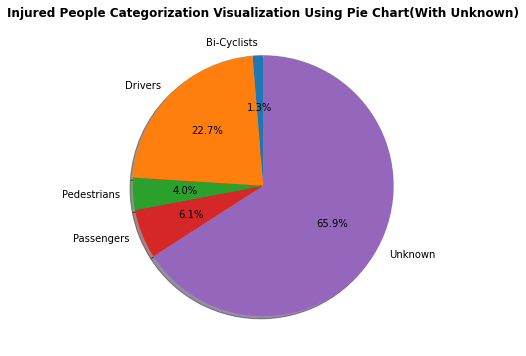

In [29]:
conn = create_connection('Normalized.db')
sql_query = "SELECT MAJORINJURIES_BICYCLIST,MINORINJURIES_BICYCLIST,UNKNOWNINJURIES_BICYCLIST,FATAL_BICYCLIST,MAJORINJURIES_DRIVER,MINORINJURIES_DRIVER,UNKNOWNINJURIES_DRIVER,FATAL_DRIVER,MAJORINJURIES_PEDESTRIAN,MINORINJURIES_PEDESTRIAN,UNKNOWNINJURIES_PEDESTRIAN,FATAL_PEDESTRIAN INTEGER,FATALPASSENGER,MAJORINJURIESPASSENGER,MINORINJURIESPASSENGER,UNKNOWNINJURIESPASSENGER FROM INJURIES"
op = execute_sql_statement(sql_query, conn)

count_bicyclist = 0
for i in op:
  if i[0] == 1 or i[1] == 1 or i[2] == 1 or i[3] == 1:
    count_bicyclist += 1

count_driver = 0
for i in op:
  if i[4] == 1 or i[5] == 1 or i[6] == 1 or i[7] == 1:
    count_driver += 1

count_pedestrian = 0
for i in op:
  if i[8] == 1 or i[9] == 1 or i[10] == 1 or i[11] == 1:
    count_pedestrian += 1

count_passenger = 0
for i in op:
  if i[12] == 1 or i[13] == 1 or i[14] == 1 or i[15] == 1:
    count_passenger += 1

count_unknown = 0
for i in op:
  if i[0] == 0 and i[1] == 0 and i[2] == 0 and i[3] == 0 and i[4] == 0 and i[5] == 0 and i[6] == 0 and i[7] == 0 and i[8] == 0 and i[9] == 0 and i[10] == 0 and i[11] == 0 and i[12] == 0 and i[13] == 0 and i[14] == 0 and i[15] == 0:
    count_unknown += 1

labels = ['Bi-Cyclists', 'Drivers', 'Pedestrians', 'Passengers', 'Unknown']
injured_list = [count_bicyclist, count_driver, count_pedestrian, count_passenger, count_unknown]
y = np.array(injured_list)
plt.title("Injured People Categorization Visualization Using Pie Chart(With Unknown)",fontweight="bold")
plt.pie(y, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

conn.close()

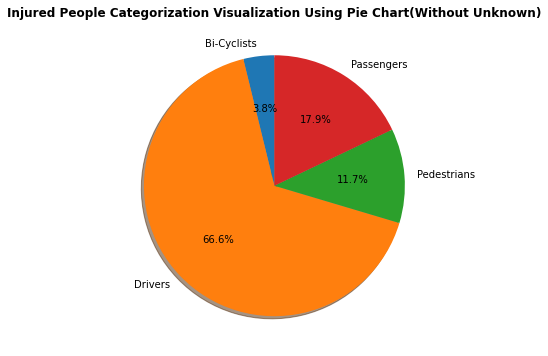

In [31]:
conn = create_connection('Normalized.db')
labels_without_unknown = ['Bi-Cyclists', 'Drivers', 'Pedestrians', 'Passengers']
injured_list_without_unknown = [count_bicyclist, count_driver, count_pedestrian, count_passenger]
k = np.array(injured_list_without_unknown)
plt.title("Injured People Categorization Visualization Using Pie Chart(Without Unknown)",fontweight="bold")
plt.pie(k, labels=labels_without_unknown, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()
conn.close()

From the above visualization, it can be understood that in majority of the reported crashes drivers(66.8%) are injured followed by passengers(17.8%) 

---

**Classification of Data based on the severity of the Crash reported.**

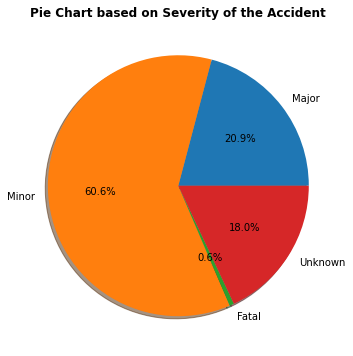

In [32]:
conn = create_connection('Normalized.db')
sql_query = "SELECT MAJORINJURIES_BICYCLIST,MINORINJURIES_BICYCLIST,UNKNOWNINJURIES_BICYCLIST,FATAL_BICYCLIST,MAJORINJURIES_DRIVER,MINORINJURIES_DRIVER,UNKNOWNINJURIES_DRIVER,FATAL_DRIVER,MAJORINJURIES_PEDESTRIAN,MINORINJURIES_PEDESTRIAN,UNKNOWNINJURIES_PEDESTRIAN,FATAL_PEDESTRIAN,FATALPASSENGER,MAJORINJURIESPASSENGER,MINORINJURIESPASSENGER,UNKNOWNINJURIESPASSENGER FROM INJURIES"
count_major = 0
for i in op:
  if i[0] == 1 or i[4] == 1 or i[8] == 1 or i[13] == 1:
    count_major += 1

count_minor = 0
for i in op:
  if i[1] == 1 or i[5] == 1 or i[9] == 1 or i[14] == 1:
    count_minor += 1

count_fatal = 0
for i in op:
  if i[3] == 1 or i[7] == 1 or i[11] == 1 or i[12] == 1:
    count_fatal += 1

count__unknown = 0
for i in op:
  if i[2] == 1 or i[6] == 1 or i[10] == 1 or i[15] == 1:
    count__unknown += 1

labels = ['Major', 'Minor', 'Fatal','Unknown']
count_list = [count_major, count_minor, count_fatal, count__unknown]

y = np.array(count_list)
#explode = (0.005,0.005,0,0)
plt.title("Pie Chart based on Severity of the Accident", fontweight="bold")
plt.pie(y, labels=labels, autopct='%1.1f%%',shadow=True)
plt.show()

conn.close()

From the above visualization, it can be understood that majority of the crashes reported are Minor(60.6%) in nature.

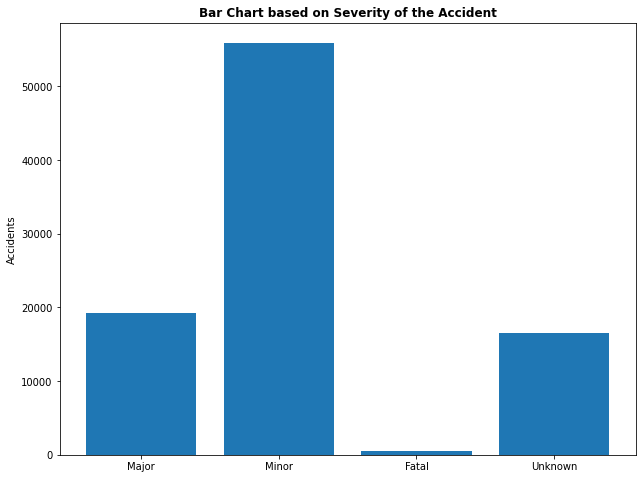

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,count_list)
plt.title("Bar Chart based on Severity of the Accident",fontweight="bold")
plt.ylabel("Accidents")
plt.show()

---

**Visualization of Crashes per Year**

Created ***Years*** table in Normalized.db by fetching the CRIMEID and REPORTDATE columns from the NonNormalized table in Non_Normalized.db

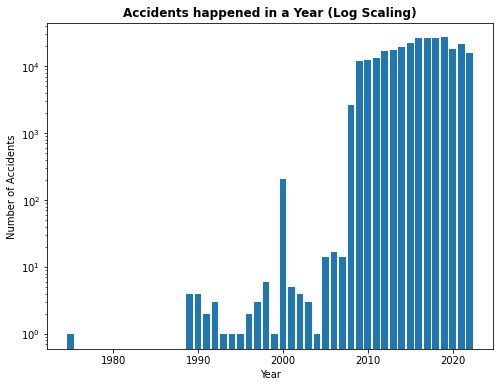

In [34]:
create_table_sql = 'CREATE TABLE YEARS(CRIMEID INTEGER NOT NULL, YEAR INTEGER NOT NULL)';
sql_fetch_data_str = "SELECT CRIMEID, REPORTDATE FROM NonNormalized"
conn = create_connection('Normalized.db')
conn_non_normalized = create_connection('Non_Normalized.db') 
op = pd.read_sql(sql_fetch_data_str, conn_non_normalized)
op.to_sql('YEARS', conn, if_exists='replace', index = False)

# Fetching the REPORTDATE column from the YEARS table
sql_query = 'SELECT * FROM YEARS WHERE REPORTDATE IS NOT NULL;'
op = execute_sql_statement(sql_query,conn)

# Creating Formatted Years Table 
create_table_new = "CREATE TABLE YEARS_FORMATTED(CRIMEID INTEGER NOT NULL, YEAR INTEGER NOT NULL)"
create_table(conn, create_table_new,"YEARS_FORMATTED")
new_list =[]
for i in range (0,len(op)):
  b = op[i][1]
  new_b = b[0:4]
  new_list.append(new_b)

val =[]
for i in range(0,len(op)):
  val.append(op[i][0])

merged_list = [(val[i], new_list[i]) for i in range(0, len(val))]

def insert_values(conn, values):
  sql = ''' INSERT OR IGNORE INTO YEARS_FORMATTED(CRIMEID,YEAR) VALUES(?,?) '''
  cur = conn.cursor()
  cur.executemany(sql,values)
  return cur.lastrowid

# Inserting the records into the YEARS_FORMATTED table with year extracted from "REPORTDATE" column
with conn:
  insert_values(conn, merged_list)

# Performing count of accidents reported per year
sql_query = "SELECT YEAR,count(*) as Total from YEARS_FORMATTED WHERE YEAR IS NOT NULL group by YEAR;"
op = execute_sql_statement(sql_query,conn)

year = []
val = []
for item in op:
   year.append(item[0])
   val.append(item[1])
val.pop()
year.pop()
x = np.array(year)
y = np.array(val)

# Scaling the data along Y-axis as the magnitude of reported crashes is large.
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accidents happened in a Year (Log Scaling)',fontweight="bold")
plt.bar(x,y)
plt.show()

conn.close()
conn_non_normalized.close()

---

***Visualization of crashes reported by Hour of the Day***

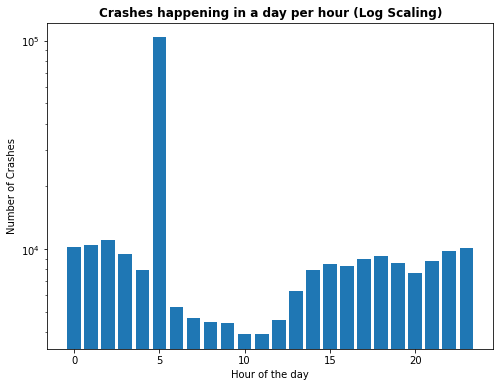

In [35]:
# Creating Hours table with CRIMEID and REPORTDATE columns of the NonNormalized table.
create_table_sql = 'CREATE TABLE HOURS(CRIMEID INTEGER NOT NULL, HOUR INTEGER NOT NULL)';
sql_query = "SELECT CRIMEID, REPORTDATE FROM NonNormalized"
conn = create_connection('Normalized.db')
conn_non_normalized = create_connection('Non_Normalized.db')
op = pd.read_sql(sql_query, conn_non_normalized)
op.to_sql('HOURS', conn, if_exists='replace', index = False)

# Fetching the REPORTDATE(NOT NULL) from HOURS and extracting Hour from the REPORTDATE.
str = 'SELECT * FROM HOURS WHERE REPORTDATE IS NOT NULL;'
op = execute_sql_statement(str,conn)
create_table_new = "CREATE TABLE HOURS_FORMATTED(CRIMEID INTEGER NOT NULL, HOUR INTEGER NOT NULL)"
create_table(conn, create_table_new,"HOURS_FORMATTED")
new_list =[]
for i in range (0,len(op)):
  b = op[i][1]
  new_b = b[11:13]
  new_list.append(new_b)

val =[]
for i in range(0,len(op)):
  val.append(op[i][0])

merged_list = [(val[i], new_list[i]) for i in range(0, len(val))]

def insert_values(conn, values):
  sql = ''' INSERT OR IGNORE INTO HOURS_FORMATTED(CRIMEID,HOUR) VALUES(?,?) '''
  cur = conn.cursor()
  cur.executemany(sql,values)
  return cur.lastrowid

with conn:
  insert_values(conn, merged_list)

#Query to count the crashed reported by hour of the day
sql_query = "SELECT HOUR,count(*) as Total from HOURS_FORMATTED WHERE HOUR IS NOT NULL group by HOUR;"

op = execute_sql_statement(sql_query, conn)

hour = []
val = []
for item in op:
   hour.append(item[0])
   val.append(item[1])

x = np.array(hour)
y = np.array(val)

plt.yscale('log')
plt.xlabel('Hour of the day')
plt.ylabel('Number of Crashes')
plt.title('Crashes happening in a day per hour (Log Scaling)',fontweight="bold");
plt.bar(x,y)
plt.show()
conn.close()
conn_non_normalized.close()

From the bar graph, it can be understood that majority of the crashes in District of Columbia are happening 5 in the morning which can be attributable to variety of reasons.

---

***Analysis of Crashes reported per Ward***

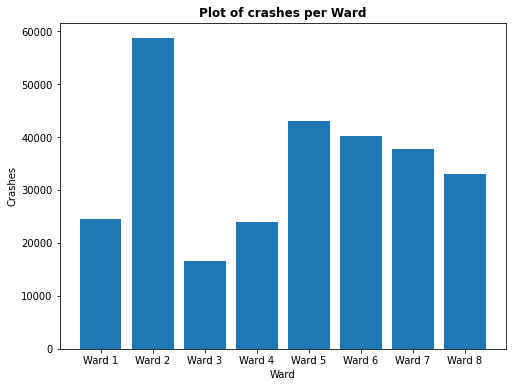

In [36]:
# Creating a new table "WARDS" in Normalized.db with CRIMEID and WARD
create_table_sql = 'CREATE TABLE WARDS(CRIMEID INTEGER NOT NULL, WARD TEXT NOT NULL)';
# Fetching the CRIMEID and WARD data from the NonNormalized table  
sql_query = "SELECT CRIMEID, WARD FROM NonNormalized WHERE WARD!='Null' OR WARD!='None'"
conn = create_connection('Normalized.db')
conn_non_normalized = create_connection('Non_Normalized.db')
op = pd.read_sql(sql_query, conn_non_normalized)
# Inserting data in dataframe to the WARDS table. 
op.to_sql('WARDS', conn, if_exists='replace', index = False)

# Fetching the count of crashes reported per ward
sql_query = "SELECT WARD,count(*) as Total from WARDS WHERE WARD IS NOT NULL group by WARD;"
op = execute_sql_statement(sql_query,conn)

war = []
val = []
for item in op:
   war.append(item[0])
   val.append(item[1])
war_1 = war[2:]
val_1 = val[2:]

x = np.array(war_1)
y = np.array(val_1)

plt.title("Plot of crashes per Ward",fontweight="bold")
plt.xlabel('Ward')
plt.ylabel('Crashes')
plt.bar(x,y)
plt.show()
conn.close()

From the above bar graph, Ward 2 experienced more crashes, which is the home of National Mall, the White House, monuments and museums, where tourists and visitors spend bulk of their time.

---

***Analysis of Crashes involving Bi-Cyclists and Pedestrians***

---



In [37]:
# Creating a new table 'BIPED' to perform analysis on crashes invoving pedestrians and bicyclists
create_biped_table = 'CREATE TABLE BIPED (MAJORINJURIES_BICYCLIST INTEGER NOT NULL,MINORINJURIES_BICYCLIST INTEGER NOT NULL,UNKNOWNINJURIES_BICYCLIST INTEGER NOT NULL,FATAL_BICYCLIST INTEGER NOT NULL,MAJORINJURIES_PEDESTRIAN INTEGER NOT NULL,MINORINJURIES_PEDESTRIAN INTEGER NOT NULL,UNKNOWNINJURIES_PEDESTRIAN INTEGER NOT NULL,FATAL_PEDESTRIAN INTEGER NOT NULL,REPORTDATE DATETIME NOT NULL)'
conn = create_connection('Normalized.db')
conn_non_normalized = create_connection('Non_Normalized.db')
create_table(conn, create_biped_table)
# Fetching the required fields for the analysis from Nonnormlised db
sql_query = "SELECT MAJORINJURIES_BICYCLIST,MINORINJURIES_BICYCLIST,UNKNOWNINJURIES_BICYCLIST,FATAL_BICYCLIST,MAJORINJURIES_PEDESTRIAN,MINORINJURIES_PEDESTRIAN,UNKNOWNINJURIES_PEDESTRIAN,FATAL_PEDESTRIAN,REPORTDATE FROM NonNormalized "
df1 = pd.read_sql_query(sql_query, conn_non_normalized)
df1['REPORTDATE'] = pd.to_datetime(df1['REPORTDATE'])
bike_ped_involved = df1[(df1.MAJORINJURIES_BICYCLIST != 0)|
                       (df1.MINORINJURIES_BICYCLIST != 0)|
                       (df1.UNKNOWNINJURIES_BICYCLIST != 0)|
                       (df1.FATAL_BICYCLIST != 0)|
                       (df1.MAJORINJURIES_PEDESTRIAN != 0)|
                       (df1.MINORINJURIES_PEDESTRIAN != 0)|
                       (df1.UNKNOWNINJURIES_PEDESTRIAN != 0)|
                       (df1.FATAL_PEDESTRIAN != 0)]
conn_non_normalized.close()

In [38]:
bike_ped_year = pd.DataFrame(bike_ped_involved.groupby(by=bike_ped_involved['REPORTDATE'].dt.year).count().REPORTDATE)
bike_ped_year.columns = ['Accidents']
bike_ped_year.index.name = 'Year'


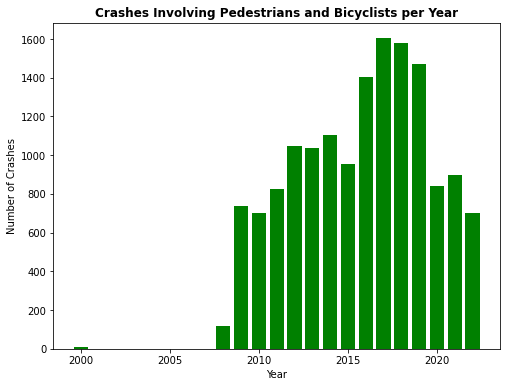

In [39]:
mpl.rcParams['figure.figsize'] = (8,6)
plt.bar(bike_ped_year.index,bike_ped_year.Accidents, color='g')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Crashes Involving Pedestrians and Bicyclists per Year',fontweight="bold")
plt.show()

Year 2017 witnessed highest number of crashes

---

***Analysis of crashes invoving Bicyclists and Pedestrians per month***

In [40]:
bic_ped_month = pd.DataFrame(bike_ped_involved.groupby(by=bike_ped_involved['REPORTDATE'].dt.month).count().REPORTDATE)
bic_ped_month.columns = ['Crashes']
bic_ped_month.index.name = 'Year'
bic_ped_month.index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
              'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bic_ped_month

,Crashes
Jan,1131
Feb,981
Mar,1184
Apr,1247
May,1296
Jun,1317
Jul,1159
Aug,1217
Sep,1347
Oct,1594


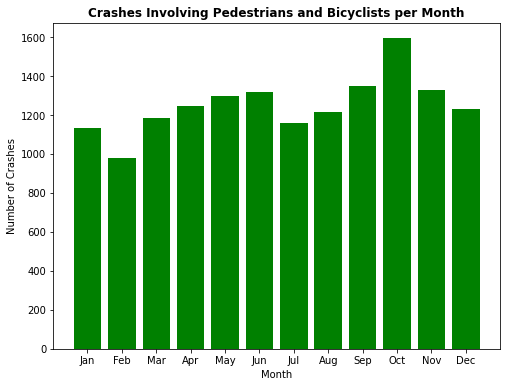

In [42]:
mpl.rcParams['figure.figsize'] = (8,6)
plt.bar(bic_ped_month.index,bic_ped_month.Crashes, color='g')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.title('Crashes Involving Pedestrians and Bicyclists per Month', fontweight="bold")
plt.show()

Crashes involving Pedestrians and Bicyclists are highest in the month of October. 

---

***Crashes involving Bicyclists and Pedestrians by time of the day***

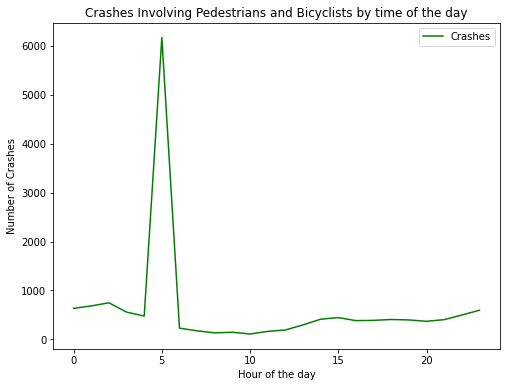

In [43]:
direction_time = pd.DataFrame(bike_ped_involved.groupby(by=bike_ped_involved['REPORTDATE'].dt.hour).count().REPORTDATE)
direction_time.columns = ['Crashes']
mpl.rcParams['figure.figsize'] = (8,6)
direction_time.plot(color='g')
plt.xlabel('Hour of the day')
plt.ylabel('Number of Crashes')
plt.title('Crashes Involving Pedestrians and Bicyclists by time of the day')
plt.show()